In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('問卷調查_編碼過1_後半.csv',encoding='utf_8_sig')
df.shape

(235, 24)

In [3]:
df.head()

,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?
0,3,1,0,1,0,0,0,5,5,3,4,5,5,5,5,5,3,4,5,5,5,5,3,1
1,3,1,0,0,0,1,0,5,5,5,5,3,5,2,2,3,5,5,5,5,5,5,5,1
2,5,1,0,0,0,0,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,3,0
3,3,1,1,0,0,0,0,3,4,5,5,5,5,4,4,2,3,3,5,4,3,2,2,1
4,3,0,0,0,1,0,0,5,5,5,5,5,4,5,5,5,4,5,5,5,5,5,3,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   年齡                                     235 non-null    int64
 1   性別                                     235 non-null    int64
 2   如何挑選化妝品(直接至開價或專櫃詢問)                    235 non-null    int64
 3   如何挑選化妝品(聽取朋友建議)                        235 non-null    int64
 4   如何挑選化妝品(到網路上爬文)                        235 non-null    int64
 5   如何挑選化妝品(看美妝YouTuber)                   235 non-null    int64
 6   如何挑選化妝品(不做任何參考)                        235 non-null    int64
 7   吸引點擊觀看 [封面好看]                          235 non-null    int64
 8   吸引點擊觀看[醒目簡潔有力]                         235 non-null    int64
 9   吸引點擊觀看 [包含目標產品]                        235 non-null    int64
 10  吸引點擊觀看 [包含產品功能]                        235 non-null    int64
 11  美妝YouTuber的介紹影片最重視? [實用性]       

In [5]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

--2021-06-22 15:00:01--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.136.100, 142.250.136.113, 142.250.136.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.136.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9comgj5gdij2s13prlm2b761i9n5uad8/1624374000000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-06-22 15:00:03--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9comgj5gdij2s13prlm2b761i9n5uad8/1624374000000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.121.132, 2607:f8b0:4001:c19::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|1

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler as ss #標準化

X = df #標準化
sc = ss()
X = sc.fit_transform(X)

kms = KMeans(n_clusters=4, random_state=42) 
y_pred = kms.fit_predict(X)
print(kms.cluster_centers_)

[[-0.18242666 -0.16601836  0.33144173 -0.24503726  0.27702455 -0.37465049
  -0.09264821 -0.37499779 -0.26669983  0.12752632 -0.02150521  0.22402849
   0.18961044 -0.32817829 -0.12002109 -0.51789698 -0.72479753 -0.79270453
   0.17367753 -0.15696605 -0.41424066 -0.36727046 -0.77267638  0.06864718]
 [ 0.02143083  0.02609313 -0.05681967  0.16638629  0.26531026 -0.45291081
  -0.09264821  0.50061683  0.54383597  0.28033644  0.24108937  0.33652258
   0.29120199  0.5270446   0.42060688  0.53336309  0.3904001   0.42657275
   0.30147431  0.45465408  0.5443957   0.35454544  0.40793233 -0.02107522]
 [ 0.18303866  0.39897802 -0.1060308   0.50536692 -0.12802993 -0.38099592
   0.49579313 -0.64124364 -0.92609241 -1.3027681  -0.99233741 -1.48024461
  -1.52874652 -0.85987348 -1.200493   -0.79859748 -0.08897447 -0.08482088
  -1.48360037 -1.21205352 -0.82913205 -0.39318895 -0.1730799  -0.45756255]
 [ 0.09836526 -0.15944863 -0.36028835 -0.47324236 -1.0479572   2.20794022
  -0.09264821  0.07212159  0.049304

In [7]:
kms.labels_

array([1, 3, 2, 0, 1, 1, 1, 2, 1, 1, 0, 3, 1, 2, 0, 0, 2, 1, 1, 0, 1, 2,
       1, 0, 0, 3, 0, 1, 3, 2, 1, 0, 1, 2, 0, 1, 0, 1, 2, 2, 0, 1, 1, 2,
       1, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 3, 2, 1, 1, 1, 1, 1, 3, 0, 1, 3,
       3, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1,
       1, 1, 1, 2, 3, 1, 0, 1, 0, 1, 0, 1, 1, 1, 3, 1, 3, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 3, 3, 3, 3, 0, 2, 0, 0, 1, 3, 3, 0, 2, 1, 1, 3, 1, 1,
       1, 0, 1, 0, 0, 2, 3, 0, 1, 1, 1, 3, 0, 3, 2, 2, 0, 1, 2, 1, 0, 3,
       1, 3, 2, 1, 2, 0, 3, 0, 0, 3, 3, 0, 1, 3, 3, 0, 1, 3, 0, 1, 1, 0,
       3, 2, 1, 2, 0, 1, 3, 0, 1, 0, 3, 2, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 2, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 2, 1, 2, 0, 3, 0, 2, 0,
       1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int32)

Text(0, 0.5, '集群內的誤差平方和')

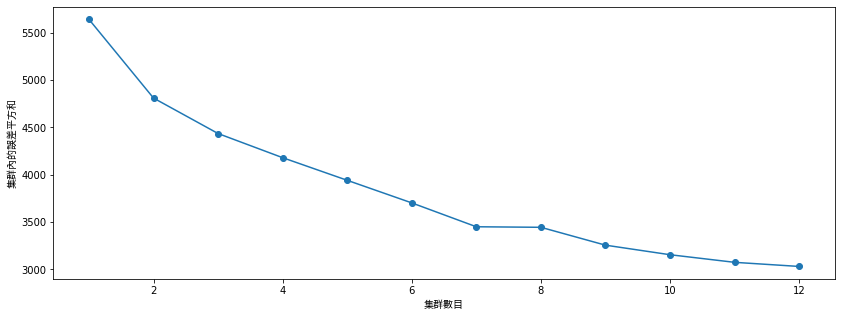

In [8]:
errors = []
for i in range(1,13):
    kms1 = KMeans(n_clusters=i)
    kms1.fit(X)
    errors.append(kms1.inertia_) #.inertia_存放「集群內的誤差平方和」。

plt.figure(figsize=(14, 5))
plt.plot(list(range(1,13)), errors, marker='o')
# plt.xlabel('集群數目', fontproperties=myfont)
# plt.ylabel('集群內的誤差平方和', fontproperties=myfont)
plt.xlabel('集群數目', fontproperties=myfont)
plt.ylabel('集群內的誤差平方和', fontproperties=myfont)

In [9]:
four_cluster_df = df.copy(deep=True)

four_cluster_df['Cluster'] = kms.labels_
four_cluster_df.head()

,年齡,性別,如何挑選化妝品(直接至開價或專櫃詢問),如何挑選化妝品(聽取朋友建議),如何挑選化妝品(到網路上爬文),如何挑選化妝品(看美妝YouTuber),如何挑選化妝品(不做任何參考),吸引點擊觀看 [封面好看],吸引點擊觀看[醒目簡潔有力],吸引點擊觀看 [包含目標產品],吸引點擊觀看 [包含產品功能],美妝YouTuber的介紹影片最重視? [實用性],美妝YouTuber的介紹影片最重視? [專業性],美妝YouTuber的介紹影片最重視?[有趣程度],美妝YouTuber的介紹影片最重視? [節奏恰當不冗長],美妝YouTuber的介紹影片最重視? [對此YouTuber的喜愛程度],美妝YouTuber的介紹影片最重視? [觀看人數],美妝YouTuber的介紹影片最重視? [影片留言之評價],美妝YouTuber的個人特質最重視?[介紹專業度],美妝YouTuber的個人特質最重視?[個人個性風格],美妝YouTuber的個人特質最重視?[講話有趣程度],美妝YouTuber的個人特質最重視? [長相],美妝YouTuber的個人特質最重視?[頻道點閱人數],上述條件滿足後，會因為美妝YOUTUBER的介紹而去購買?,Cluster
0,3,1,0,1,0,0,0,5,5,3,4,5,5,5,5,5,3,4,5,5,5,5,3,1,1
1,3,1,0,0,0,1,0,5,5,5,5,3,5,2,2,3,5,5,5,5,5,5,5,1,3
2,5,1,0,0,0,0,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,3,0,2
3,3,1,1,0,0,0,0,3,4,5,5,5,5,4,4,2,3,3,5,4,3,2,2,1,0
4,3,0,0,0,1,0,0,5,5,5,5,5,4,5,5,5,4,5,5,5,5,5,3,1,1
